## Text_Preprocessing

### Importing the required libraries 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

### Reading train and test data

In [2]:
train_df = pd.read_csv('train (3).csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


#### Train dataset having 7613 rows and 5 columns
#### Test dataset having 3263 rows and 4 columns

## Data Visualization

In [59]:
def plot_count(df,col_list,title_name='Train'):

    # setting up subplots
    f, ax = plt.subplots(len(col_list),2,figsize=(12,5))
    plt.subplots_adjust(wspace=0.3)

    for col in col_list:

        # computing value counts in each category of column
        s1 = df[col].value_counts()
        # number of unique values in column
        N = len(s1)

        # prepare data for pie chart
        outer_sizes = s1
        inner_sizes = s1/N

        # setting color for pie charts
        outer_colors = ['#FF6347','#20B2AA']
        inner_colors = ['#FFA07A','#40E0D0']

        # creating outer pie chart
        ax[0].pie(
            outer_sizes,
            colors = outer_colors,
            labels = s1.index.tolist(),
            startangle = 45,
            frame = True,
            radius = 1.2,
            explode = ([0.05]*(N-1)+[.2]),
            wedgeprops = {'linewidth' : 1, 'edgecolor' : 'white' },
            textprops = {'fontsize' : 14, 'weight' : 'bold'},
            shadow = True
        )

        # creating inner pie plot
        ax[0].pie(
            inner_sizes,
            colors = inner_colors,
            radius=0.8,
            startangle = 45,
            autopct = '%1.f%%',
            explode = ([.1]*(N-1) + [.2]),
            pctdistance = 0.8,
            textprops = {'size': 13, 'weight': 'bold', 'color': 'black'},
            shadow = True
        )

        # add centre circle/ creating donut chart effect
        center_circle = plt.Circle((0,0), .5, color='black', fc='white', linewidth=0)
        ax[0].add_artist(center_circle)

        # create Bar plot
        sns.barplot(
            x = s1,
            y = s1.index,
            ax = ax[1],
            palette = 'coolwarm',
            orient = 'horizontal'
        )

        # customizing te bar plot
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False)
        ax[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
        ax[1].set_ylabel('')  # Remove y label

        for i, v in enumerate(s1):
            ax[1].text(v, i+0.1, str(v), color='black', fontweight='bold', fontsize=14)
        
        # Adding labels and title
        plt.setp(ax[1].get_yticklabels(), fontweight="bold")
        plt.setp(ax[1].get_xticklabels(), fontweight="bold")
        ax[1].set_xlabel(col, fontweight="bold", color='black', fontsize=14)

    # Setting a global title for all subplots
    f.suptitle(f'{title_name} Dataset Distribution of {col} : real disaster(1) or not(0)', fontsize=20, fontweight='bold', y=1.05)

    # Adjusting the spacing between the plots
    plt.tight_layout()
    plt.show()
        
        
        

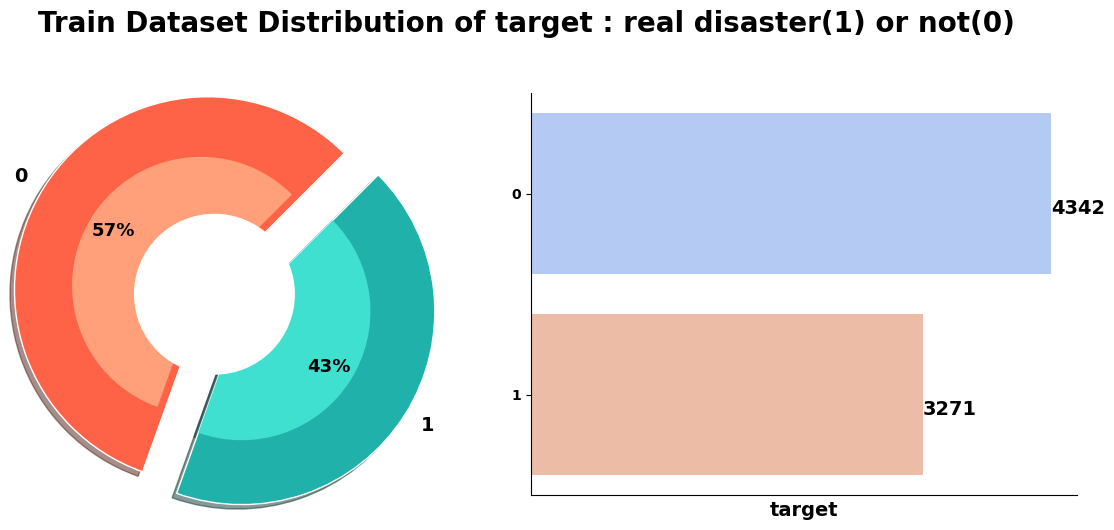

In [60]:
plot_count(train_df,['target'],'Train')

## Data Cleaning

In [62]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [63]:
# dropping un-necessary columns
dropped_train_df = train_df.drop(['id','keyword','location'],axis=1)

In [64]:
dropped_train_df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [65]:
replace_collocations = {
    "aren't": "are not",
    "can't": "cannot",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    # **"hasnt": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "here's": "here is",
    "isn't": "is not",
    "it's": "it is",
    "i'm": "i am",
    # **"im": "i am",
    "i've": "i have",
    "it'll": "it will",
    "it'd": "it would",
    "i'd": "i would",
    "i'll": "i will",
    # **"ill": "i will",
    "mightn't": "might not",
    "mustn't": "must not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "shouldn't": "should not",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "there's": "there has",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
     "we're": "we are",
    "weren't": "were not",
    "won't": "will not",
    "wouldn't": "would not",
    "what's": "whats",
    "you're": "you are",
    "you'll": "you will",
    "you'd": "you would",
}

replace_abbreviations = {
    "ave": "avenue",
    "hwy": "highway",
    "intl": "international",
    "st": "saint",
    "stats": "statistics",
    "pkwy": "parkway",
    "av": "autonomous vehicle",
    "conf": "confirm",
    "rd": "road",
    "dr": "doctor",
    "wtf": "what the fuck",
    "mf": "motherfucker",
    "omg": "oh my god",
    "rip": "rest in peace",
    "esp": "especially",
    "ok": "okay",
    "ny": "new york",
    "bc": "because",
    "bcz": "because",
    "sr": "senior",
    "vs": "versus",
}

replace_word_symbols = {
    "&amp": "&",
    "&gt": ">",
}
    

In [66]:
dummy_text="""http://t.co/9FxmN0l0Bd
Revel in yours wmv videos by means of mac farewell ablaze wmv en route to dvd: GtxRWm
"Progressive greetings! https://sitebulb.com/hints/security/https-url-links-to-an-http-url/
In about a month students would have set their pens ablaze in The Torch
A 17 year Boy Scout created a mini nuclear reactor in his home
@dicehateme @PuppyShogun This makes sense. Paper beats rock paper comes from wood so wood should be able to support and obliterate rock.
The  People's  Republic  Of  China  (  PROC  ): Abandon the West Philippine Sea and all the ... https://t.co/pD14GsrfSC via @ChangePilipinas
@realDonaldTrump to obliterate notion & pattern political style seemly lead voter beliefs Sarcasm Narcissism #RichHomeyDon #Swag #USA #LIKES
"#fun #instagramers http://t.co/M3NJvvtYgN

Jeb Bush said earlier this week that not only does he want to obliterate Planned Parenthood bu‰Û_"
Souda leave Lady Sonia alone or I shall obliterate you #KneelBot
@klavierstuk doesn't so LVG is forced into the market. May beat Spurs and smaller teams with Blind LCB. Top 4/ CL teams will obliterate us.
Whereas Jez will obliterate the national debt - and give lots of new benefits - by simply printing money! Genius! https://t.co/ReffbkVG9R
#LOL Plymouth (‰Û÷Let‰Ûªs Obliterate Litter‰Ûª) http://t.co/GDrssjbH8q
http://www.amazon.co.jp/エレクトロニクス-デジタルカメラ-ポータブルオーディオ/b/ref=topnav_storetab_e?ie=UTF8&node=3210981
According to prophecy and also CNN a Mac tablet will completely obliterate the need for other gadgets. Combining‰Û_ http://t.co/xfccvMXuWb
@JoseBasedGod I'm obliterate you to the shadow realm.
Meek Mill Begging Nicki Minaj To Let Him Obliterate... #ovofest #nowplaying http://t.co/XOmI4ZQzgp http://t.co/0m1TW3DaTd
World of warships makes me mad sometimes but it's soooo satisfying when you cross the T on a battleship and just obliterate it
Watch Sarah Palin OBLITERATE Planned Parenthood For Targeting Minority Women! ‰ÛÒ BB4SP http://t.co/fqMYprlG9g kijan99683@cumzle.com
'But time began at last to obliterate the freshness of my alarm;...' http://t.co/ciLO9pMlEb mason@日本.com
@MacBreck I know what it means.It means I'll go on Twitter and obliterate any CHANCE of EVER winning another election for Pres.bad at math. kijfgdan9.9_68fefghfdgdg3@cumzle.com
Watch Sarah Palin OBLITERATE Planned Parenthood For Targeting Minority Women! ‰ÛÒ BB4SP http://t.co/sAYZt2oagm
'We are now prepared to obliterate more rapidly and completely every productive enterprise the Japanese have above ground in any city.'
@horiikawa i played online last niBght and got my ass obliteratedVB kijan99683@cumzle.com
RIZZO IS ON ???????? THAT BALL WAS OBLITERATED
Obliterated
Damnnnn $GMCR got obliterated -26% ;that should pay HUGE to whomever played accordingly
air sunrays obliterated on its hairy head like a dried wire spiderweb
I'm about to be obliterated
@breakingnewslh @bree_mars watch cnn's the seventies terrorism episode. Iran has always hated the U.S. They want us obliterated.
"Me- Don't bother calling or texting me because my phone is obliterated

*has 7k missed calls and messages*"
Kontrolled Media say 'US good. Putin bad. #WW3 good Peace bad'. TOTAL BS! Leave Russia alone. DON'T DICE WITH OBLITERATION. #demonization
This is interesting!--Why did God order obliteration of ancient Canaanites? http://t.co/XqMJHIOZxG via @worldnetdaily
@LaurenJauregui I would say I'm dead but I'm not that right there was obliteration
Why did God order obliteration of ancient Canaanites? http://t.co/NckOgWjq61 via @worldnetdaily
OH. #TeamHennessy #NJ Obliteration  @tprimo24 ROUND 1 Happy Birthday @djeddygnj Colombian Festival‰Û_ https://t.co/mRv54fiDfn
I need an arcade shooter fix but CTE is empty & only running obliteration. I'd even buy a CoD title if they weren't all overpriced on steam
@ThatSabineGirl you get me sis. this planet could do with a huge dose of obliteration.
Are people not concerned that after #SLAB's obliteration in Scotland #Labour UK is ripping itself apart over #Labourleadership contest?
@AuntieDote @RioSlade @Locke_Wiggins @akarb74 Not if one side is set on obliteration of govt and the other on fixing it. That's too far
Why did God order obliteration of ancient Canaanites? http://t.co/IkugGvByeI
@tiggr_ why only Squad Obliteration?
Why did God order obliteration of ancient Canaanites? http://t.co/NLk1DYD2tP
Back in 02 to 03 would never said that 50 would have ended ja like obliteration
@Eganator2000 There aren't many Obliteration servers but I always like to play when there are :D
What a win by Kerry. 7-16..... #obliteration
@ashberxo @mind_mischief the removal of all traces of something; obliteration.
Why did God order obliteration of ancient Canaanites? http://t.co/Sf2vwQvJYa
Why did God order obliteration of ancient Canaanites? http://t.co/Hz4lKFfC59 via @worldnetdaily#Homosexuality is the downfall of a society.
I added a video to a @YouTube playlist http://t.co/1vjAlJA1SX GTA 5 Funny Moments - 'OBLITERATION!' (GTA 5 Online Funny Moments)
There are no four truths-of pain of desire that is the origin of pain of the obliteration of that desire of the pain to that obliteration.
Alhaji Putin is far from being a good person sha. At least I had front row seat to his complete obliteration of Ibeto cement a competitor.
Dead Space - Obliteration Imminent [2/2]: http://t.co/XJB0dCAaHf via @YouTube
Which is true to an extent. The obliteration of white privilege would reduce unfair favoritism.
Does Renovation Mean Obliteration? http://t.co/pQ3ipUgkuY #entrepreneur #management #leadership #smallbiz #startup #business
For maximum damage! Activate [BIG BAND MODE] for old-timey obliteration!
Why did God order obliteration of ancient Canaanites? http://t.co/pKKcdWjyg0 via @worldnetdaily
He is justifying why this quarrel would one day end in d obliteration of what remains as the state of Pakistan. https://t.co/z8Ij8KTkyk
Fear is the mind killer. Fear is the little-death that brings total obliteration.  Bene Gesserit Litany Against Fear Dune   @atgrannyshouse
"Path of Obliteration
Back From The Dead
Story by @KyleWappler @thisishavehope

 http://t.co/1PdNlsP8XW"
SB57 [NEW] Deepwater Horizon Oil Spill distribution of funds from BP settlement road and bridge projects in Bal... http://t.co/dKpsrkG6pc
California oil spill might be larger than projected: http://t.co/xwxBYHTuzC http://t.co/wzeDxEFBlg
Refugio oil spill may have been costlier bigger than projected: A Plains All American Pipeline oil spill off ... http://t.co/yhmrEgAuxZ
LA Times: Refugio oil spill may have been costlier bigger than projected http://t.co/g37huJx6et
'California: Spring Oil Spill Estimate Grows ' by THE ASSOCIATED PRESS via NYT http://t.co/6Cx46E7QB7
Refugio oil spill may have been costlier bigger than projected http://t.co/41L8tqCAey
Refugio oil spill may have been costlier bigger than projected http://t.co/Rqu5Ub8PLF
Refugio oil spill may have been costlier bigger than projected http://t.co/OSJUrFDDkt
Refugio oil spill may have been costlier bigger than projected http://t.co/lzob8qOH1B
Refugio oil spill may have been costlier bigger than projected http://t.co/BIEYgUqpB1
Sydney Traffic HAZARD Oil spill - BANKSTOWN Stacey St at Wattle St #sydtraffic #trafficnetwork
Plains All American Pipeline company may have spilled 40% more crude oil than previously estimated #KSBYNews @lilitan http://t.co/PegibIqk2w
SYD traffic HAZARD Oil spill - BANKSTOWN Stacey St at Wattle St http://t.co/TZyHdBW9f5
"Watch our video of Wendell Berry speaking about the BP oil spill in the Gulf of Mexico.

It‰Ûªs the birthday... http://t.co/tN1aX1xMBB"
National Briefing | West: California: Spring Oil Spill Estimate Grows: Documents released on Wednesday disclos... http://t.co/wBi7Laq18E
DTN Brazil: Refugio oil spill may have been costlier bigger than projected: A Plains All American Pipeline oi... http://t.co/pDOSrg8Cf7
Hannah: 'Hiroshima sounds like it could be a place in China. Isn't that where the oil spill was?'
Refugio oil spill may have been costlier bigger than projected http://t.co/aP30psZkVx
Refugio oil spill may have been costlier bigger than projected (LA Times) http://t.co/TCSoLvwhXq
California: Spring Oil Spill Estimate Grows: Documents released on Wednesday disclosed that an oil sp... http://t.co/zqiHnHDWPV #OSI2016
Refugio oil spill may have been costlier bigger than projected http://t.co/gtHddzAvhg #LosAngelesTimes #latimes #newspel (acoustic) http://t.co/VCq2icptKI
"Lose bus card.
Panic.
Kind bus driver.
Replace bus card.
Find bus card.
Headdesk."
Savs contact fell out but she was convinced it didnt & went on to guage her eyeball out & now shes having a panic attack over caused damage
"@james_justus *returns her*

...fucking."
@Siren_Song21 my pc account got hacked. Someone tried to pull out over 1200 bucks which wasn't there Now I have an nsf & no idea who or why
Don't argue cheap now. You're better than that. ??
The real question is why is the tornado siren going off in Dyersburg?
"Can you save
Can you save my
Can you save my heavydirtysoul?"

Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/uJNRGFAnGj http://t.co/TmIpEgQyeV
Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/pOL92mn8YZ
...//..// whao.. Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.co/tuVbR4lEP3
Look at the previous battles. Citizens were committing suicide so to not be under American control. The bomb was the only way. @NBCNews
she's a suicide bomb
@CodeMeW Were you opening regular or master packs? RT: so‰Û_ sunk‰Û_1 mil credits into light side‰Û_ didn't pull‰Û_one‰Û_you sure about those odds?
Yup. Still hasn't sunk in. ?? https://t.co/Ii2SpVP89b
@SaintRobinho86 someone has to be at the bottom of every league. Tonight clearly demonstrated why the Lions are where they are - sunk!
It still hasn't sunk in that I've actually met my Idol ????
@UntamedDirewolf 'I... Wow. Alright.' Sansa shook her head and blinked rapidly as the new information sunk in. 'I really don't know what--
@BenAffleck  i respected you and liked you for your talent. i guess i stil do but as a human being you've sunk low Mr.Affleck!
Once upon a time the fact that I decided to go to university 7 hours away actually sunk in
#ArrestpastorNganga it so worrying 2 see how some police officers in Kenya have sunk to low to the point of collaborating with pick pockets
@time4me_sews I know! It still hasn't quite sunk in :D
The feeling of lonelyness has sunk into me strange depressing feeling.
We may be just a week away from school but I don't think the idea of me being a senior has really sunk in yet
im getting a car wow it hasn't sunk in
FOOTBALL IS BACK THIS WEEKEND ITS JUST SUNK IN ??????
One Direction is taking a break after this next album. My heart has sunk it hurts and I'm very upset. They deserve a break. My heart hurts
Aquarium Ornament Wreck Sailing Boat Sunk Ship Destroyer Fish Tank Cave Decor - Full read ‰Û_ http://t.co/nosA8JJjiN http://t.co/WUKvdavUJu
The court‰Ûªs reputation and prestige has sunk ever lower and Prosser who has served on the court since 1998 BETRAYED
http://t.co/0Q040STkCV
#books"
In a dream you saw a way to survive and you were full of joy.
16 Stylishly Unique Houses That Might Help You Survive the Zombie Apocalypse | http://t.co/AU3DBCI7nf http://t.co/BOvJRF62T7
"[+]

Such a lonely day
And it's mine
It's a day that I'm glad I survived ...

??"
Haley Lu Richardson Fights for Water in The Last Survivors (Review) http://t.co/oObSCFOKtQ
Remembrance  http://t.co/ii4EwE1QIr #Hiroshima http://t.co/H3vUsqzyQo
"Truth...
https://t.co/h6amECX5K7
#News
#BBC
#CNN
#Islam
#Truth
#god
#ISIS
#terrorism
#Quran
#Lies http://t.co/B8iWRdxcm0"
News786-UK Islamist Cleric Anjem Choudary Charged Under Terrorism Act: http://t.co/u7bBeNXWYK
@RobPulseNews @huyovoeTripolye Phillips should be charged for assisting terrorism. LDNR-terrorists' organizations. http://t.co/XwnJYsV9V9
Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d
"""

### Regular Expression

In [67]:
# This regex pattern is designed to match and remove URLs.
no_html=r'http[s]?://(?:[\w]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9\w][0-9\w]))+'

# This regex pattern is designed to match and remove email addresses.
no_emails=r"[\w0-9!#$%.(),:;<>@[\]&'\"*+-/=?^_`{|}~]+@[\w0-9_]+\.[\w0-9]+"

# This regex pattern is designed to match and remove Twitter-like usernames.
no_names='@[\w]+'

# This regex pattern is designed to match and remove IP addresses.
no_ip='d{1,3}.d{1,3}.d{1,3}.d{1,3}'

# This regex pattern is designed to match and remove non-alphanumeric symbols.
no_symbols='[^a-zA-Z0-9 ]'

### Applying 're.sub'
The re.sub function replaces the matched patterns in the dummy_text with an empty string ''.

In [69]:
abc = re.sub(no_html, '', dummy_text)
abc = re.sub(no_emails, '',abc)
abc = re.sub(no_names, '',abc)
abc = re.sub(no_ip, '',abc)
abc = re.sub(no_symbols, '',abc)

print(abc)

Revel in yours wmv videos by means of mac farewell ablaze wmv en route to dvd GtxRWmProgressive greetings In about a month students would have set their pens ablaze in The TorchA 17 year Boy Scout created a mini nuclear reactor in his home  This makes sense Paper beats rock paper comes from wood so wood should be able to support and obliterate rockThe  Peoples  Republic  Of  China    PROC   Abandon the West Philippine Sea and all the   via  to obliterate notion  pattern political style seemly lead voter beliefs Sarcasm Narcissism RichHomeyDon Swag USA LIKESfun instagramers Jeb Bush said earlier this week that not only does he want to obliterate Planned Parenthood buSouda leave Lady Sonia alone or I shall obliterate you KneelBot doesnt so LVG is forced into the market May beat Spurs and smaller teams with Blind LCB Top 4 CL teams will obliterate usWhereas Jez will obliterate the national debt  and give lots of new benefits  by simply printing money Genius LOL Plymouth Lets Obliterate Li

In [79]:
def cleaner_func(text):

    # change all characters to lowercase
    text = text.lower()

    # remove specified  ASCII characters
    for val in replace_word_symbols:
        text = re.sub(val, '', text)

    # remove HTML links
    no_html = r'http[s]?://(?:[\w]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9\w][0-9\w]))+'

    # remove email addresses
    no_emails = r"[\w0-9!#$%.(),:;<>@[\]&'\"*+-/=?^_`{|}~]+@[\w0-9_]+\.[\w0-9]+"

    # remove dates
    no_dates = r'\b(0[1-9]|1[0-2])[-/](0[1-9]|[12]\d|3[01])[-/](\d\d)\b'

    # remove profile names
    no_names = r'@[\w]+'

    # remove IP addresses
    no_ip = r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b'

    # remove all punctuation marks and symbols
    no_symbols = r'[^a-zA-Z0-9 \n]'

    # substitute
    lists_of_changes=[no_html, no_emails, no_dates, no_names, no_ip, no_symbols]
    for val in lists_of_changes:
        text=re.sub(val, '', text)

    # replacements
    replacement_changes=[replace_collocations, replace_abbreviations]
    for change_type in replacement_changes:
        for txt,re_txt in change_type.items():
            text=re.sub('\b' + txt + '\b', re_txt, text)

    # replace nextlines by a space
    text = re.sub('[\n]', '', text)

    # replace double or more spaces with a single space
    text = re.sub('[ ]{2,}', ' ', text)

    return text

In [80]:
# applying cleaner_func on 'dummy_text'

dummy_text_cleaned = cleaner_func(dummy_text)
dummy_text_cleaned

'revel in yours wmv videos by means of mac farewell ablaze wmv en route to dvd gtxrwmprogressive greetings in about a month students would have set their pens ablaze in the torcha 17 year boy scout created a mini nuclear reactor in his home this makes sense paper beats rock paper comes from wood so wood should be able to support and obliterate rockthe peoples republic of china proc abandon the west philippine sea and all the via to obliterate notion pattern political style seemly lead voter beliefs sarcasm narcissism richhomeydon swag usa likesfun instagramers jeb bush said earlier this week that not only does he want to obliterate planned parenthood busouda leave lady sonia alone or i shall obliterate you kneelbot doesnt so lvg is forced into the market may beat spurs and smaller teams with blind lcb top 4 cl teams will obliterate uswhereas jez will obliterate the national debt and give lots of new benefits by simply printing money genius lol plymouth lets obliterate litter according 

In [81]:
# apply 'cleaner_func' for train dataset
dropped_train_df['text'].apply(cleaner_func)

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609     the out of control wild fires in california e...
7610                m194 0104 utc5km s of volcano hawaii 
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object